In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn.model_selection import cross_val_predict,StratifiedKFold
from sklearn.metrics import classification_report,precision_recall_curve,confusion_matrix,PrecisionRecallDisplay,RocCurveDisplay

## Data Prep

In [3]:
mnist=fetch_openml('mnist_784',as_frame=False)

In [4]:
X,y=mnist.data,mnist.target

In [5]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [8]:
def plot_digit(image_data):
    image=image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis("off")

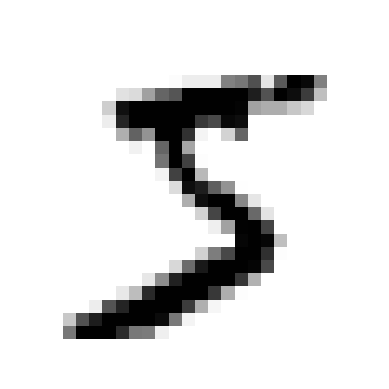

In [9]:
plot_digit(X[0])

In [10]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000:],y[60000:]

In [ ]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
y_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       60000 non-null  object
dtypes: object(1)
memory usage: 468.9+ KB


In [51]:
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [31]:
y_train_5

,0
0,True
1,False
2,False
3,False
4,False
...,...
59995,False
59996,False
59997,True
59998,False


## Model Selection

In [18]:
ran=RandomForestClassifier()
y_pred=cross_val_predict(ran,X,y,cv=5)
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6964
           1       0.99      0.98      0.99      7891
           2       0.97      0.96      0.96      7068
           3       0.96      0.96      0.96      7088
           4       0.97      0.97      0.97      6856
           5       0.96      0.97      0.97      6264
           6       0.98      0.98      0.98      6918
           7       0.97      0.97      0.97      7249
           8       0.95      0.96      0.95      6785
           9       0.95      0.95      0.95      6917

    accuracy                           0.97     70000
   macro avg       0.97      0.97      0.97     70000
weighted avg       0.97      0.97      0.97     70000



In [19]:
sgd=SGDClassifier()
y_pred=cross_val_predict(sgd,X,y,cv=5)
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      7194
           1       0.95      0.97      0.96      7736
           2       0.83      0.91      0.87      6383
           3       0.87      0.80      0.83      7823
           4       0.87      0.93      0.90      6445
           5       0.83      0.77      0.80      6798
           6       0.92      0.91      0.92      6964
           7       0.88      0.92      0.90      7051
           8       0.79      0.78      0.79      6909
           9       0.82      0.85      0.84      6697

    accuracy                           0.88     70000
   macro avg       0.87      0.88      0.87     70000
weighted avg       0.88      0.88      0.88     70000



In [ ]:
sgd=SGDClassifier()
y_pred_5=cross_val_predict(sgd,X_train,y_train_5,cv=5)
print(classification_report(y_pred_5,y_train_5))

c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expec

              precision    recall  f1-score   support

       False       0.99      0.97      0.98     55380
        True       0.72      0.84      0.78      4620

    accuracy                           0.96     60000
   macro avg       0.85      0.91      0.88     60000
weighted avg       0.97      0.96      0.96     60000



In [36]:
sgd.fit(X_train,y_train_5)

c:\Users\nichu\.conda\envs\jupytorch\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [129]:
y_scores_5=sgd.decision_function(X_train)
y_scores_5

array([  -203.89071758, -16029.59817487, -19777.66428143, ...,
         4561.92124641,  -4911.34437484, -10209.24662622])

In [131]:
precision,recall,threshold=precision_recall_curve(y_train_5,y_scores_5)

In [132]:
#preicision and recall
t_recall=0.8
t_precision=0.8
distances=np.sqrt((recall[:-1]-t_recall)**2+(precision[:-1]-t_precision)**2)
best_index=np.argmin(distances)
best_threshold=threshold[best_index]
best_threshold

np.float64(-1145.8702355329813)

In [117]:
idx_for_precision=(precision>=0.9).argmax()
best_threshold=threshold[idx_for_precision]
best_threshold

np.float64(189.6116663795157)

In [125]:
precision

array([0.0892    , 0.08920892, 0.08921784, ..., 1.        , 1.        ,
       1.        ])

In [126]:
idx=(precision>0.9)
idx

array([False, False, False, ...,  True,  True,  True])

In [118]:
idx_for_recall=(recall>=0.9).argmin()
best_threshold=threshold[idx_for_recall]
best_threshold

np.float64(-3066.258669217396)

In [119]:
threshold=-3066
y_threshold_5=(y_scores_5>threshold)
cm=confusion_matrix(y_threshold_5,y_test_5)
print(classification_report(y_threshold_5,y_test_5))
cm

              precision    recall  f1-score   support

       False       0.94      0.99      0.96      8607
        True       0.90      0.58      0.70      1393

    accuracy                           0.93     10000
   macro avg       0.92      0.78      0.83     10000
weighted avg       0.93      0.93      0.93     10000



array([[8516,   91],
       [ 592,  801]])

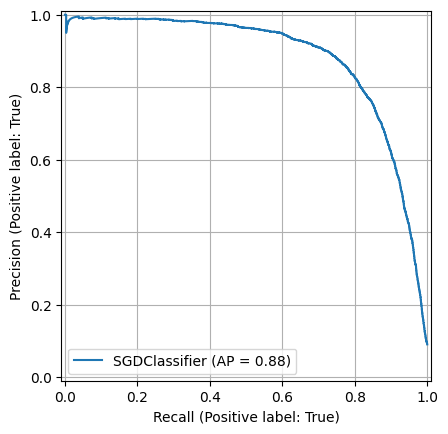

In [135]:
PrecisionRecallDisplay.from_estimator(sgd,X_train,y_train_5)
plt.grid(True)
plt.show()

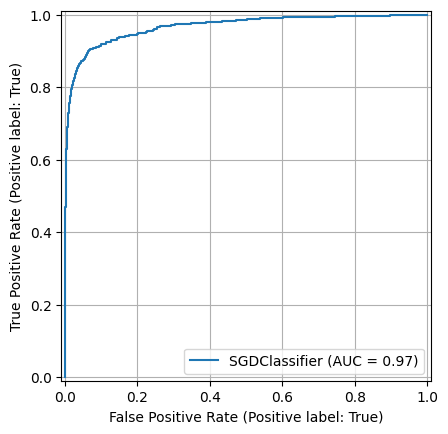

In [128]:
RocCurveDisplay.from_estimator(sgd,X_test,y_test_5)
plt.grid(True)
plt.show()

In [ ]:
y